In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [140]:
train_dt=pd.read_csv('/content/fraudTrain.csv')
test_dt=pd.read_csv('/content/fraudTest.csv')
train_dt.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [141]:
train_dt.shape

(1296675, 23)

In [142]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [143]:
train_dt.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [144]:
train_dt.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [145]:
train_dt['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


In [146]:
fraud=train_dt[train_dt.is_fraud==1]
non_fraud=train_dt[train_dt.is_fraud==0]

In [147]:
print(fraud.shape)
print(non_fraud.shape)

(7506, 23)
(1289169, 23)


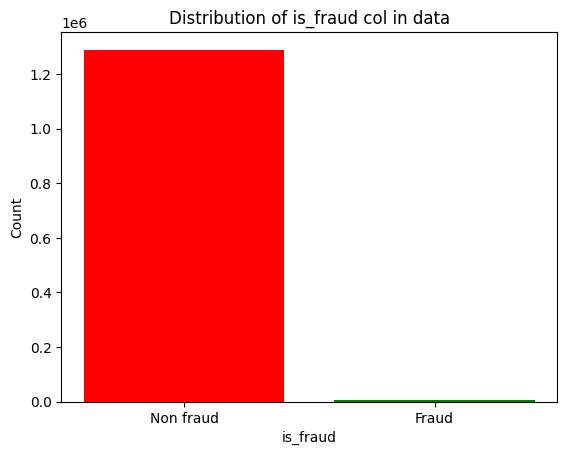

In [148]:
labels=['Non fraud','Fraud']
count=train_dt['is_fraud'].value_counts()
values=count.values
plt.bar(labels,values,color=['red','green'])
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Distribution of is_fraud col in data')
plt.show()

In [149]:
non_fraud_sample=non_fraud.sample(n=7506)
non_fraud_sample.shape

(7506, 23)

In [150]:
balanced_data=pd.concat([non_fraud_sample,fraud],axis=0)
balanced_data.shape

(15012, 23)

In [151]:
balanced_data['is_fraud'].value_counts()

,count
is_fraud,
0,7506
1,7506


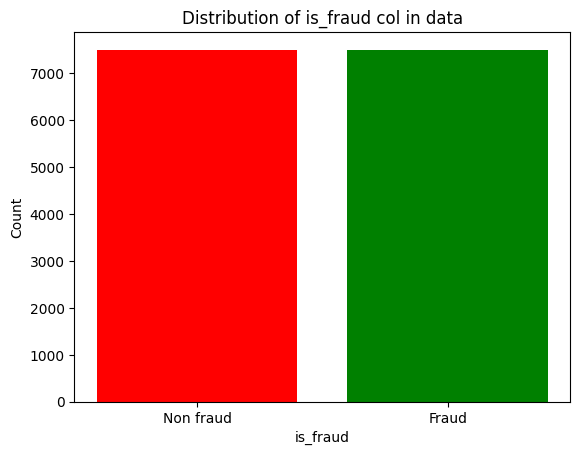

In [152]:
labels=['Non fraud','Fraud']
count=balanced_data['is_fraud'].value_counts()
values=count.values
plt.bar(labels,values,color=['red','green'])
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Distribution of is_fraud col in data')
plt.show()

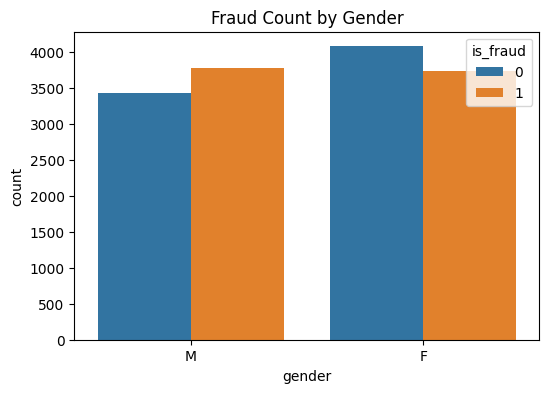

In [153]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='is_fraud', data=balanced_data)
plt.title("Fraud Count by Gender")
plt.show()


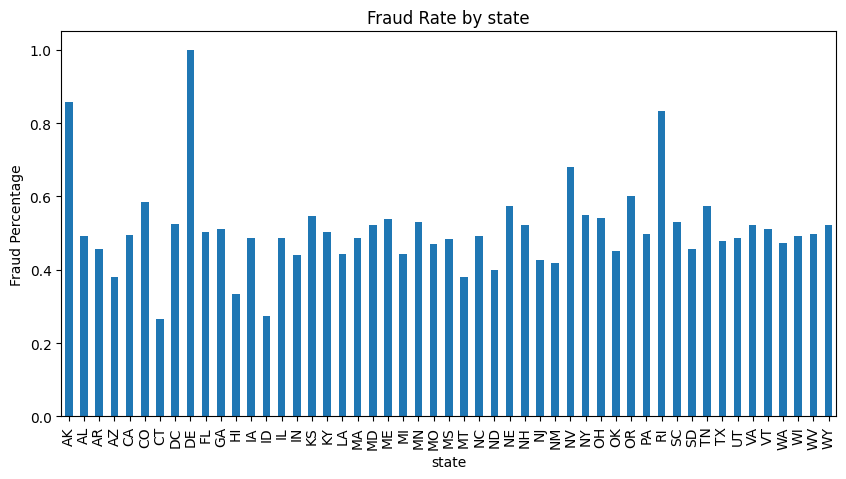

In [154]:
plt.figure(figsize=(14, 8))
fraud_rates = balanced_data.groupby("state")["is_fraud"].mean()
fraud_rates.plot(kind="bar", figsize=(10,5))
plt.title("Fraud Rate by state")
plt.ylabel("Fraud Percentage")
plt.xticks(rotation=90)
plt.show()


In [155]:
balanced_data.drop(columns=['first','last','trans_date_trans_time'],axis=1,inplace=True)
test_dt.drop(columns=['first','last','trans_date_trans_time'],axis=1,inplace=True)
balanced_data.shape

(15012, 20)

In [156]:
object_cols=[]
for i in balanced_data.columns:
    if balanced_data[i].dtype=='object':
        object_cols.append(i)
print(object_cols,len(object_cols))

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'] 9


In [157]:
balanced_data.drop(columns=['Unnamed: 0'], inplace=True)
test_dt.drop(columns=['Unnamed: 0'], inplace=True)

In [158]:
balanced_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1003513,4666314527820883145,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,33.57,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,41.0233,-98.9041,2202,"Solicitor, Scotland",1974-06-21,97001252971728f6b3dbfb34b0ac6c41,1361003289,42.019431,-99.748727,0
1154342,4681699462969,"fraud_Goyette, Howell and Collier",shopping_pos,2.21,M,319 Wendy Fort Suite 179,Murfreesboro,TN,37132,35.8596,-86.4210,158701,"Journalist, newspaper",1978-03-06,171e1301f848fe7cd9f74c80e920cdfd,1367001216,35.440449,-87.339800,0
556264,3513618443244549,fraud_Dietrich-Fadel,health_fitness,45.50,F,954 Reyes Ways,Fulton,SD,57340,43.7588,-97.8712,355,Financial adviser,1955-06-26,c8a5283dac786a3a5f521d57c26d4b11,1345906954,44.572548,-98.129509,0
1112550,4302480582202074,fraud_Padberg-Rogahn,entertainment,2.53,M,821 Solis Points,Muskegon,MI,49440,43.2326,-86.2492,128715,Historic buildings inspector/conservation officer,1995-05-25,1eb9a6bbd07aa71395eb1f4c14bd8ddd,1365350380,42.284618,-85.979165,0
472502,4497451418073897078,fraud_Padberg-Welch,grocery_pos,177.34,F,246 Stewart Green Suite 149,West Monroe,LA,71291,32.5317,-92.1760,54185,"Radiographer, diagnostic",1992-11-20,e6129478f27bf9f73461e08bd3f3b31e,1343383777,32.887206,-91.733126,0


In [159]:
balanced_data['merchant'] =balanced_data['merchant'].apply(lambda x: x.split(',')[0].strip())
test_dt['merchant'] = test_dt['merchant'].apply(lambda x: x.split(',')[0].strip())


In [160]:
encoder=LabelEncoder()
for i in object_cols:
    balanced_data[i]=encoder.fit_transform(balanced_data[i])
    test_dt[i]=encoder.fit_transform(test_dt[i])
print(balanced_data.info())
print(test_dt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 1003513 to 1295733
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      15012 non-null  int64  
 1   merchant    15012 non-null  int64  
 2   category    15012 non-null  int64  
 3   amt         15012 non-null  float64
 4   gender      15012 non-null  int64  
 5   street      15012 non-null  int64  
 6   city        15012 non-null  int64  
 7   state       15012 non-null  int64  
 8   zip         15012 non-null  int64  
 9   lat         15012 non-null  float64
 10  long        15012 non-null  float64
 11  city_pop    15012 non-null  int64  
 12  job         15012 non-null  int64  
 13  dob         15012 non-null  int64  
 14  trans_num   15012 non-null  int64  
 15  unix_time   15012 non-null  int64  
 16  merch_lat   15012 non-null  float64
 17  merch_long  15012 non-null  float64
 18  is_fraud    15012 non-null  int64  
dtypes: float64(5), int64(1

In [161]:
x_train=balanced_data.drop('is_fraud',axis=1)
y_train=balanced_data['is_fraud']
x_test=test_dt.drop('is_fraud',axis=1)
y_test = test_dt['is_fraud']

In [169]:
model_reg=LogisticRegression(max_iter=500)
model_Random=RandomForestClassifier(n_estimators =100,random_state=42)
model_reg.fit(x_train, y_train)
model_Random.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [170]:
y_pred_reg=model_reg.predict(x_test)
y_pred_Random=model_Random.predict(x_test)


In [171]:
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test,y_pred_reg))
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test,y_pred_Random))

ACCURACY OF THE MODEL: 0.9961401355721147
ACCURACY OF THE MODEL: 0.9695133691667911


In [162]:
def evaluate_fitness(individual, x_train, y_train, x_test, y_test):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0

    X_train_sel = x_train.iloc[:, selected_features]
    X_test_sel = x_test.iloc[:, selected_features]

    model = RandomForestClassifier()
    model.fit(X_train_sel, y_train)
    preds = model.predict(X_test_sel)

    return accuracy_score(y_test, preds)


In [163]:
def top_k_selection(population, fitnesses, k):
    combined = list(zip(population, fitnesses))
    sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
    return [ind for ind, _ in sorted_combined[:k]]


In [164]:
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2


In [165]:
def mutate(individual, mutation_rate=0.01):
    return [bit if random.random() > mutation_rate else 1 - bit for bit in individual]


In [166]:
def initialize_population(pop_size, num_features):
    population = []
    for _ in range(pop_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

In [167]:
def genetic_algorithm(X_train, y_train, X_test, y_test, pop_size=20, generations=10, k=10):
    num_features = X_train.shape[1]
    population = initialize_population(pop_size, num_features)

    for gen in range(generations):
        print(f"Generation {gen+1}")
        fitnesses = [evaluate_fitness(ind, X_train, y_train, X_test, y_test) for ind in population]

        selected = top_k_selection(population, fitnesses, k)

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(selected, 2)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            if len(new_population) < pop_size:
                new_population.append(mutate(child2))

        population = new_population

    final_fitnesses = [evaluate_fitness(ind, X_train, y_train, X_test, y_test) for ind in population]
    best_individual = population[np.argmax(final_fitnesses)]
    best_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    return best_features


In [168]:
best_features = genetic_algorithm(x_train, y_train, x_test, y_test)
print("Selected Features:", x_train.columns[best_features])


Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Selected Features: Index(['cc_num', 'merchant', 'category', 'amt', 'street', 'city', 'zip',
       'long', 'city_pop', 'dob', 'unix_time'],
      dtype='object')
